# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Module 04 ML/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.duplicated().value_counts()

# hence we ensuring that there is no duplicate row information in the dataset

False    7043
dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

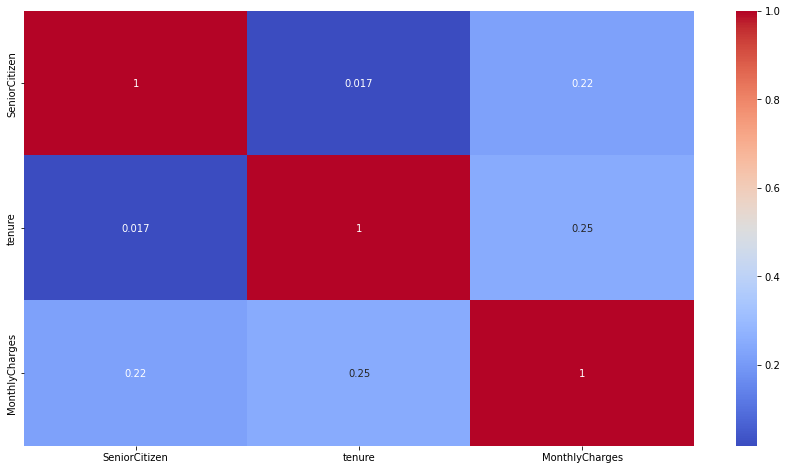

In [ ]:
plt.figure(figsize = (15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

In [ ]:
df.describe().columns[1:]

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

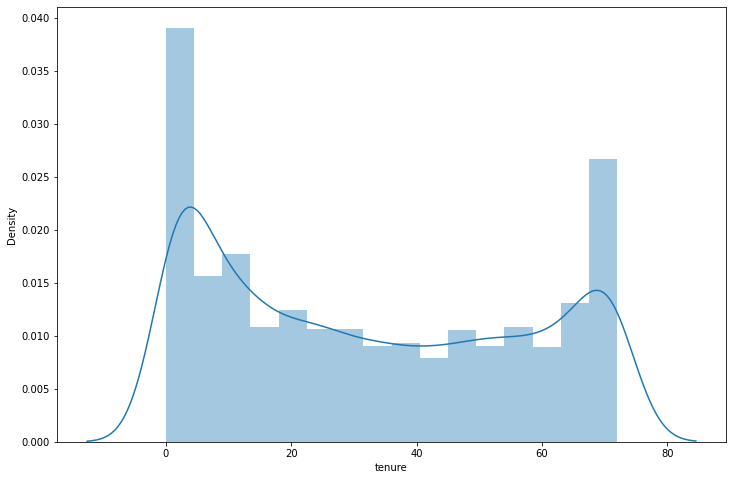

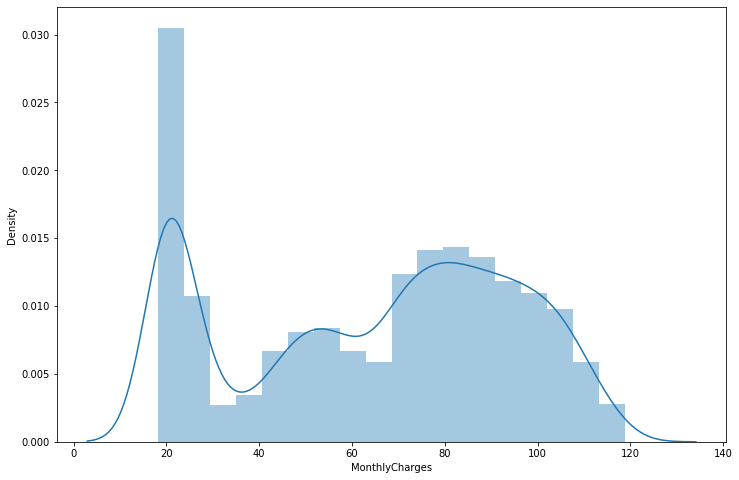

In [ ]:
for col in df.describe().columns[1:]:
  plt.figure(figsize=(12,8))
  sns.distplot(df[col])
plt.show()

In [ ]:
df[df.describe().columns]

,SeniorCitizen,tenure,MonthlyCharges,class
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


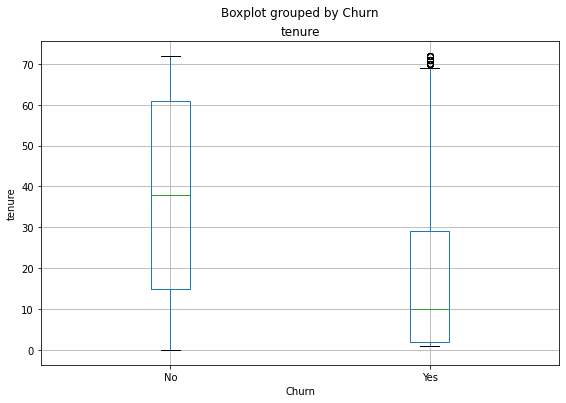

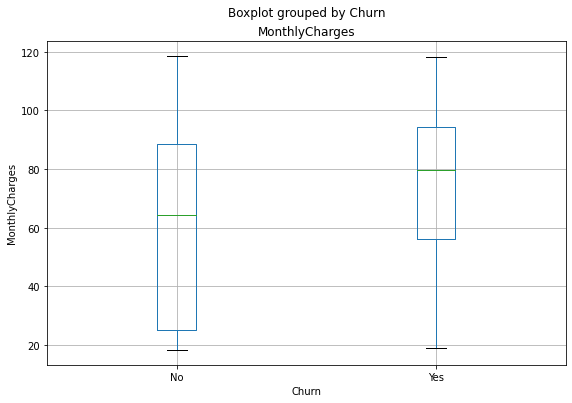

In [ ]:
for col in df.describe().columns[1:]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, by = 'Churn', ax = ax)
  ax.set_ylabel(col)
plt.show()

In [ ]:
df.describe(include = ["object","category"]).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
df.shape

(7043, 22)

In [ ]:
df.drop(columns = ["TotalCharges"], axis = 1, inplace = True)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df1 = df.loc[:,['MonthlyCharges','tenure','class']]

In [ ]:
df2 = df[['gender','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup' ,'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]

In [ ]:
df2 = pd.get_dummies(df2, drop_first = True)

In [ ]:
 n_df=pd.concat([df2, df1.reindex(df2.index)], axis=1)

In [ ]:
n_df.shape

(7043, 28)

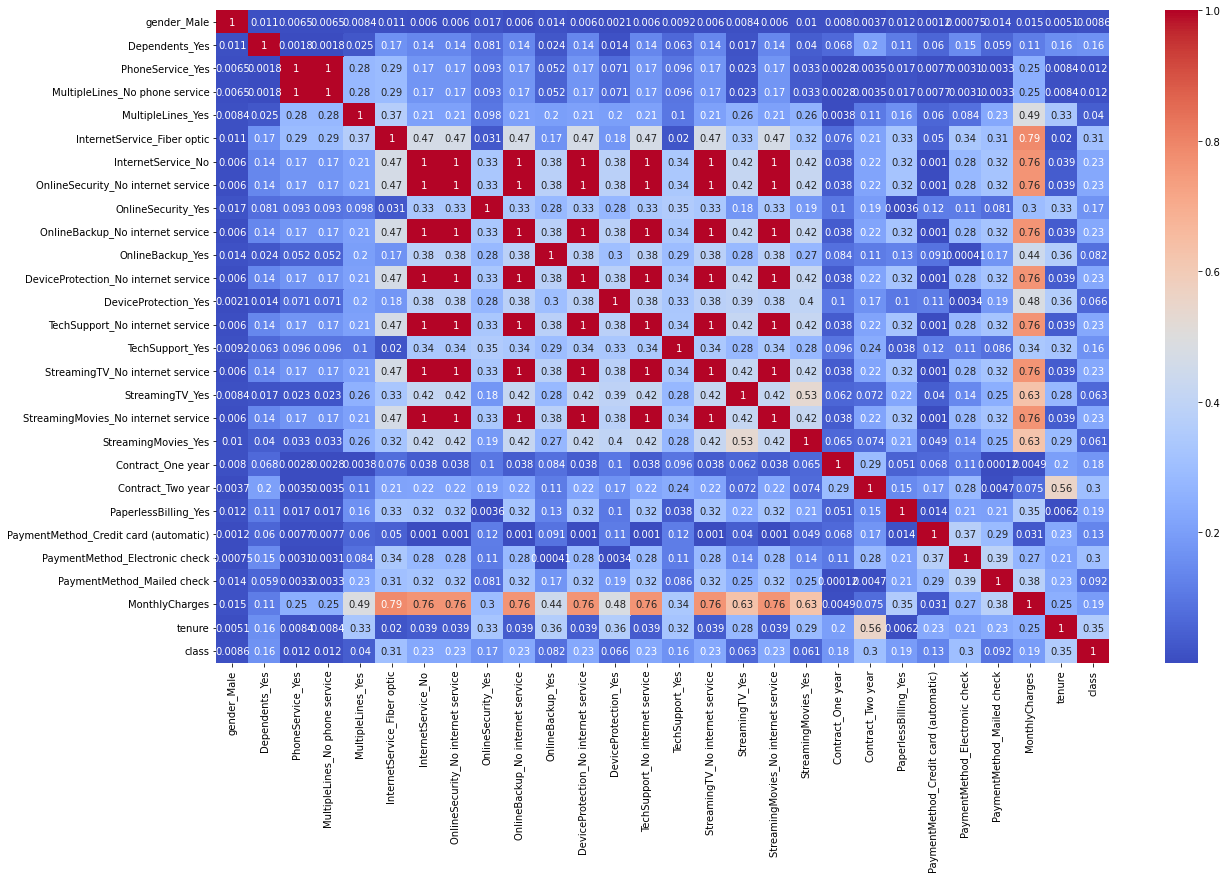

In [ ]:
plt.figure(figsize=(20,12))
correlation = n_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
n_df

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure,class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,29.85,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,56.95,34,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,53.85,2,1
3,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,42.30,45,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,70.70,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,84.80,24,0
7039,0,1,1,0,1,1,0,0,0,0,...,1,1,0,1,1,0,0,103.20,72,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,29.60,11,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,74.40,4,1


In [ ]:
n_df.drop(['InternetService_Fiber optic',	'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',	'TechSupport_No internet service','StreamingTV_No internet service','StreamingTV_Yes',	'StreamingMovies_No internet service','StreamingMovies_Yes','MultipleLines_No phone service','Contract_Two year','MultipleLines_Yes','OnlineBackup_Yes','DeviceProtection_Yes','Dependents_Yes','Dependents_Yes','Dependents_Yes','Contract_One year','PaymentMethod_Credit card (automatic)','TechSupport_Yes','OnlineSecurity_Yes','PaymentMethod_Mailed check','PaperlessBilling_Yes','PaymentMethod_Electronic check'],axis=1,inplace=True)

In [ ]:
n_df

,gender_Male,PhoneService_Yes,MonthlyCharges,tenure,class
0,0,0,29.85,1,0
1,1,1,56.95,34,0
2,1,1,53.85,2,1
3,1,0,42.30,45,0
4,0,1,70.70,2,1
...,...,...,...,...,...
7038,1,1,84.80,24,0
7039,0,1,103.20,72,0
7040,0,0,29.60,11,0
7041,1,1,74.40,4,1


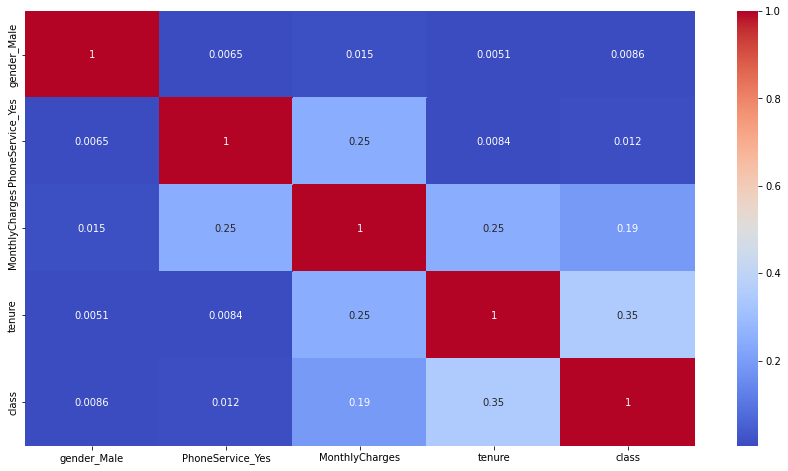

In [ ]:
plt.figure(figsize=(15,8))
correlation = n_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
n_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0,inplace=True)

In [ ]:
n_df.dropna(inplace = True)

In [ ]:
X = n_df.iloc[:,:-1]
y = n_df['class'].copy()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[-0.03008722, -0.90335375,  0.03705335, -0.05810833]])

In [ ]:
clf.intercept_

array([-1.17223962])

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, y_train)
print(accur)

0.7889598864039759


In [ ]:
accur1=metrics.accuracy_score(y_pred, y_test)
accur1

0.7771469127040455

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
metrics.confusion_matrix(y_pred_train, y_train)

array([[3746,  802],
       [ 387,  699]])

In [ ]:
metrics.confusion_matrix(y_pred, y_test)


array([[935, 208],
       [106, 160]])

From the confusion matrix we can say that :

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

In this case of our data, the model correctly predicts 938 cases as people who not churn and predicted as not churn and 168 cases as people who churn and our model also predicted as churn. In contrast, it mispredicts a total of 301 cases.

In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1143
           1       0.43      0.60      0.50       266

    accuracy                           0.78      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.81      0.78      0.79      1409



Precision is 0.90 means 90 percent times it predicted correctly that people not churn from all the cases of people actully not churns similarly as in people who churns are 367 but it predicted 168 times that they churns so its precision is low

Recall= peolple truly predicted who not churn /people who predicted churns hence it is 938/(938+201)=0.82 similarly for people who churn.

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.

In [ ]:
metrics.roc_auc_score(y_train, train_preds[:,1])

0.8171905075622623

In [ ]:
metrics.roc_auc_score(y_test, test_preds[:,1])

0.7946137702042353

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In our case our auc-roc value is 0.80 so we caan say that our model predicted the classes in a good manner.

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,test_preds[:,1])

0.4623005014843747

A good and model should have a smaller log loss value.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.792) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.794) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.791, test=0.769) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.793, test=0.777) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.784, test=0.808) total time=   0.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [ ]:
scores['train_accuracy']

array([0.78766363, 0.78744176, 0.79076991, 0.79254493, 0.78416149])

In [ ]:
scores['test_accuracy']

array([0.79236912, 0.79414374, 0.76929902, 0.77728483, 0.80817052])

In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[ 0.00142525 -0.79360672  0.03628844 -0.05755819]]
[[-0.11956821 -0.89975895  0.03606228 -0.05707315]]
[[-0.00486216 -0.94479496  0.03864854 -0.06003853]]
[[-0.00497697 -0.99390043  0.03816945 -0.05917109]]
[[-0.02121438 -0.87194087  0.03615406 -0.05678549]]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786170 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786170 (0.010419) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786170 (0.010419) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786123 (0.010187) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785744 (0.010048) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785128 (0.012414) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


From seeing the results from above i have a intution that the lesser the value of c in my case will help me to create the good model.becase with lower value of c=100 we have higher value of score.